# **Data in Design, AI for Urban Data and Visualization**

#### Data, Design Computation, Artificial Intelligence, Visualization, Harvard GSD


**KEYWORD:**
Vector, Raster, Urban Data, GIS, Data Processing, Data Mining, Machine Learning, Artificial Intelligence, Visualization, Mapping, Design Decision-Making

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - hhttps://namjulee.github.io/njs-lab-public/ 

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

# Texture Prediction
### STEP 13 CNN Models
###### BY NJ Namju Lee / nj.namju@gmail.com / 

<h6> http://www.njstudio.co.kr </h6>
<h6> http://www.njslab.com/NJSLabCore/ </h6>
<h6> https://www.youtube.com/c/CodeforDesign </h6>
<h6> https://medium.com/@nj-namju </h6>

In [72]:
import glob
import os
import PIL
import PIL.Image
import cv2

In [73]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [74]:
from tensorflow.keras.models import load_model
modelLoaded = load_model('checkPointCallBack.h5')
modelLoaded.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               3840128   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 7)                 455       
Total params: 3,848,839
Trainable params: 3,848,839
Non-trainable params: 0
____________________________________________

In [99]:
PATH_SAVED = "dataProcessed"
files = glob.glob(PATH_SAVED + "/*.*")
classList = []

for f in files:
    type = f.split('\\')[-1].split('_')[0]
    if type not in classList:
        classList.append(type)
print(classList)

np.random.seed(2222)
np.random.shuffle(files)

data = []
target = []
for f in files:
    type = f.split('\\')[-1].split('_')[0]
    if (type in classList):
        id = classList.index(type)
        target.append(id)

        im = cv2.imread (f, cv2.IMREAD_COLOR)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        array = tf.keras.preprocessing.image.img_to_array(im)
        data.append(array)

dataArray = np.array(data)

['brick', 'concrete', 'floor', 'grass', 'roof', 'sidewalk', 'wall']


In [100]:
from tensorflow.keras.utils import to_categorical
targetOnehot = to_categorical(target)
len(targetOnehot[0])

7

In [101]:
print('sample total num: {}'.format(dataArray.shape[0]))
sampleNum = int(dataArray.shape[0] * 0.2)
print('sample val num: {}'.format(sampleNum))

sampleNumTest = int(sampleNum * 0.5)
print('sample test num: {}'.format(sampleNumTest))

sample total num: 427
sample val num: 85
sample test num: 42


In [102]:
trainX = dataArray[:-sampleNum]
val_test_X = dataArray[-sampleNum:]
testX = val_test_X[-sampleNumTest:]
valX = val_test_X[ :- sampleNumTest]


trainY = targetOnehot[:-sampleNum]
val_test_Y = targetOnehot[-sampleNum:]
testY = val_test_Y[ -sampleNumTest:]
valY = val_test_Y[ sampleNumTest:]

NUM_CLASS = len(targetOnehot[0])


In [103]:
print('Total num data:          ', dataArray.shape)
print('num data for train:      ', trainX.shape)
print('num data for validation: ', valX.shape)
print('num data for test:       ',  testX.shape)

Total num data:           (427, 100, 100, 3)
num data for train:       (342, 100, 100, 3)
num data for validation:  (43, 100, 100, 3)
num data for test:        (42, 100, 100, 3)


In [104]:
print('Total num data:          ', dataArray.shape)
print('num data for train:      ', trainY.shape)
print('num data for validation: ', valY.shape)
print('num data for test:       ',  testY.shape)

Total num data:           (427, 100, 100, 3)
num data for train:       (342, 7)
num data for validation:  (43, 7)
num data for test:        (42, 7)


In [105]:
modelLoaded.evaluate(trainX, trainY)
modelLoaded.evaluate(testX, testY)
modelLoaded.evaluate(valX, valY)

2/2 [==============================] - 0s 4ms/step - loss: 463.9566 - accuracy: 0.2558


[463.9565734863281, 0.25581395626068115]

In [106]:
predY = modelLoaded.predict(trainX)
print(predY)

[[0.0000000e+00 3.9218940e-20 3.5784362e-21 ... 4.3373125e-37
  0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 2.0854637e-11]
 [2.1747062e-02 0.0000000e+00 9.7825295e-01 ... 5.1302063e-34
  1.0699735e-18 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


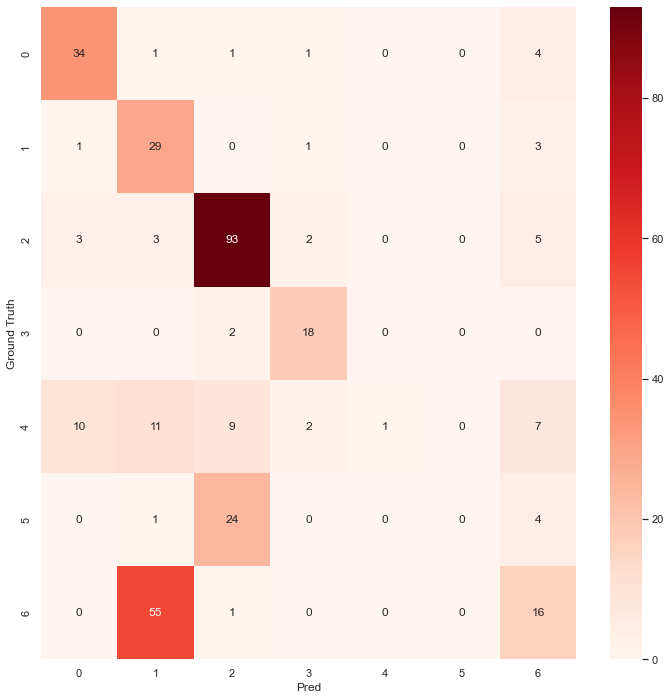

In [107]:
#  https://stackoverflow.com/questions/47435526/what-is-the-meaning-of-axis-1-in-keras-argmax
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

import seaborn as sns
sns.set(style='dark')

yTestYOnehot = trainY

plt.figure(figsize=(12,12))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

Build CNN network model

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dropout, Flatten, Dense, Input

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 33856)             0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 33856)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 7)               

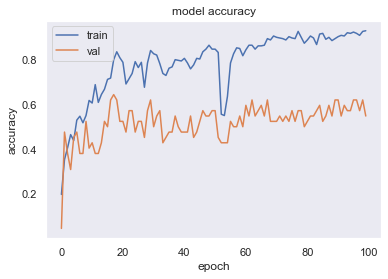

In [109]:
modelSecond = Sequential(
    [
        Input(shape=(100,100,3)),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.2),
        Dense(NUM_CLASS, activation="softmax"),
    ]
)

modelSecond.summary()
modelSecond.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
              
histSecond = modelSecond.fit(
    trainX, trainY, 
    epochs=100, batch_size=32,
    # verbose=0,
    validation_data=(testX, testY)
    )
modelSecond.evaluate(trainX, trainY)
modelSecond.evaluate(testX, testY)
modelSecond.evaluate(valX, valY)
plt.plot(histSecond.history['accuracy'])
plt.plot(histSecond.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 96, 96, 64)        4864      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 46, 46, 32)        18464     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 16928)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 7)                 118503    
Total params: 141,831
Trainable params: 141,831
Non-trainable params: 0
_______________________________________________

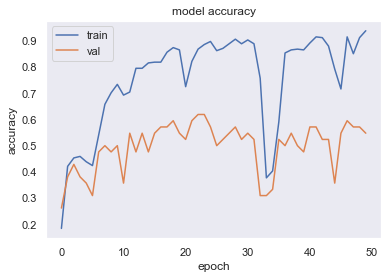

In [110]:
modelSecond = Sequential()
modelSecond.add(Conv2D(64, kernel_size=(5,5), input_shape=(100,100,3), padding='valid', activation='relu'))
modelSecond.add(MaxPooling2D(pool_size=(2,2)))
# modelSecond.add(Dropout(0.15))
modelSecond.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
modelSecond.add(MaxPooling2D(pool_size=(2,2)))
# modelSecond.add(Dropout(0.5))
modelSecond.add(Flatten())
modelSecond.add(Dense(NUM_CLASS, activation='softmax'))

modelSecond.summary()
modelSecond.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
              
histSecond = modelSecond.fit(
    trainX, trainY, 
    epochs=50, batch_size=32,
    verbose=0,
    validation_data=(testX, testY)
    )
modelSecond.evaluate(trainX, trainY)
modelSecond.evaluate(testX, testY)
modelSecond.evaluate(valX, valY)
plt.plot(histSecond.history['accuracy'])
plt.plot(histSecond.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 46, 46, 16)        4624      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 23, 23, 16)        0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 8464)            

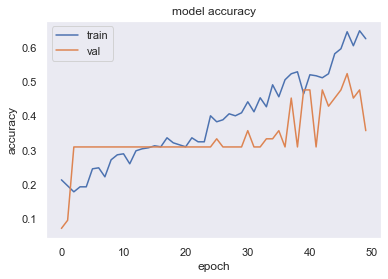

In [111]:
modelSecond = Sequential()
modelSecond.add(Conv2D(32, kernel_size=(5,5), input_shape=(100,100,3), padding='valid', activation='relu'))
modelSecond.add(MaxPooling2D(pool_size=(2,2)))
modelSecond.add(Dropout(0.15))
modelSecond.add(Conv2D(16, kernel_size=(3,3),  padding='valid',  activation='relu'))
modelSecond.add(MaxPooling2D(pool_size=(2,2)))
modelSecond.add(Dropout(0.45))
modelSecond.add(Flatten())
modelSecond.add(Dense(NUM_CLASS, activation='softmax'))

modelSecond.summary()
modelSecond.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
              
histSecond = modelSecond.fit(
    trainX, trainY, 
    epochs=50, batch_size=32,
    verbose=0,
    validation_data=(testX, testY)
    )
modelSecond.evaluate(trainX, trainY)
modelSecond.evaluate(testX, testY)
modelSecond.evaluate(valX, valY)
plt.plot(histSecond.history['accuracy'])
plt.plot(histSecond.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
